In [2]:
#Importing all library functions
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#Reading the iris data to a dataframe
iris_df = pd.read_csv("iris.csv")

In [4]:
#Analysing data type of the fields
iris_df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
#Checking if there are null values in any rows
iris_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

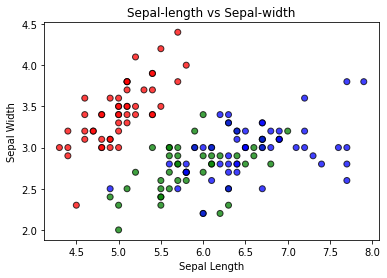

In [12]:
#Scatter plot to explore relationship between sepal length and sepal width for the three categories
sepallength = iris_df['SepalLengthCm']
sepalwidth = iris_df['SepalWidthCm']
species = iris_df['Species']
colors = {'Iris-setosa':'red', 'Iris-versicolor':'green', 'Iris-virginica':'blue'}
plt.scatter(sepallength, sepalwidth, c=species.map(colors), edgecolor='black', linewidth=1, alpha=0.75)
plt.title('Sepal-length vs Sepal-width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


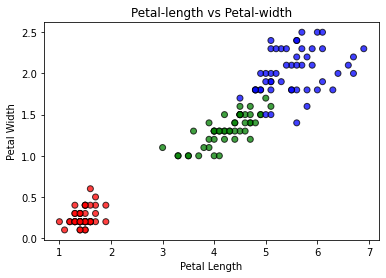

In [13]:
#Scatter plot to explore relationship between petal length and petal width for the three categories
petallength = iris_df['PetalLengthCm']
petalwidth = iris_df['PetalWidthCm']
species = iris_df['Species']
colors = {'Iris-setosa':'red', 'Iris-versicolor':'green', 'Iris-virginica':'blue'}
plt.scatter(petallength, petalwidth, c=species.map(colors), edgecolor='black', linewidth=1, alpha=0.75)
plt.title('Petal-length vs Petal-width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

In [59]:
#Converting categorical variable Species to Numerical for the Classification algorithm
iris_df["Species"] = iris_df["Species"].astype('category')
iris_df["Species"] = iris_df["Species"].cat.codes
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
X = iris_df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
y = iris_df['Species']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int8

In [7]:
#Split data into training and testing groups
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)


In [48]:
#Observe training and testing samples
print(X_train.shape)
print(y_train.shape)

(112, 4)
(112,)


In [8]:
print(X_test.shape)
print(y_test.shape)

(38, 4)
(38,)


In [39]:
#chose a value for k
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [40]:
#Data for which iris prediction has to be made
X_predict=np.array([[7.0, 4.3, 3.1, 1.6]])
X_predict.shape

(1, 4)

In [41]:
#Making the prediction
prediction = knn.predict(X_predict)
print(prediction)


[1]


In [42]:
# The algorithm predicts that the given flower according to its data belongs to the second category which is Iris-versicolor

In [43]:
#Measuring accuracy. The model is 97% accurate in predicting the class based on sepal and petal attributes
y_predict = knn.predict(X_test)
print(y_predict)
print(np.mean(y_predict == y_test))

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
0.9736842105263158
